<a href="https://colab.research.google.com/github/hansinihirunika/PneumoniaDetection/blob/main/DetectPneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
!nvidia-smi

Wed Feb 15 04:58:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
#re-size the images
IMAGE_SIZE = [224, 224]
#path to the datasets
traindataset_path = "/content/drive/MyDrive/Programs/Datasets/Train"
testdataset_path = "/content/drive/MyDrive/Programs/Datasets/Test"

In [ ]:
#ResNet library 
#Transfer learning technique
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 6s 0us/step


In [ ]:
#existing weights as false
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
#the number of output classes in Train
folders = glob("/content/drive/MyDrive/Programs/Datasets/Train/*")

In [ ]:
folders

['/content/drive/MyDrive/Programs/Datasets/Train/bacteria',
 '/content/drive/MyDrive/Programs/Datasets/Train/virus',
 '/content/drive/MyDrive/Programs/Datasets/Train/normal']

In [ ]:
#the number of output classes in Test
folders = glob("/content/drive/MyDrive/Programs/Datasets/Test/*")

In [ ]:
folders

['/content/drive/MyDrive/Programs/Datasets/Test/virus',
 '/content/drive/MyDrive/Programs/Datasets/Test/normal',
 '/content/drive/MyDrive/Programs/Datasets/Test/bacteria']

In [ ]:
#flatten the output / adding the last layer
y = Flatten()(resnet.output)

In [ ]:
#how many output nodes that want 
#softmax use for multiple categories
prediction = Dense(len(folders), activation='softmax')(y)

# creating a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
#the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
#optimization method
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = "accuracy"
)

In [ ]:
# Image Data Generator - imports images from dataset
#data argumentation techniques
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trainDatagenerator = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2
)

# only scaling process for test
testDatagenerator = ImageDataGenerator(rescale = 1./255)

In [ ]:
# reading the train dataset
trainingDataset = trainDatagenerator.flow_from_directory(
    "/content/drive/MyDrive/Programs/Datasets/Train",
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 5236 images belonging to 3 classes.


In [ ]:
# reading the test dataset
testingDataset = testDatagenerator.flow_from_directory(
    "/content/drive/MyDrive/Programs/Datasets/Test",
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 624 images belonging to 3 classes.


In [ ]:
#fitting model
r = model.fit_generator(
    trainingDataset,
    validation_data=testingDataset,
    epochs=20,
    steps_per_epoch=len(trainingDataset),
    validation_steps=len(testingDataset)
)

<ipython-input-18-da6235917cb3>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
328/328 [==============================] - 2215s 7s/step - loss: 1.3746 - accuracy: 0.5296 - val_loss: 1.5395 - val_accuracy: 0.5224
Epoch 2/20
328/328 [==============================] - 125s 381ms/step - loss: 1.0110 - accuracy: 0.6161 - val_loss: 0.8145 - val_accuracy: 0.5673
Epoch 3/20
328/328 [==============================] - 132s 401ms/step - loss: 0.9905 - accuracy: 0.6373 - val_loss: 0.7096 - val_accuracy: 0.7628
Epoch 4/20
328/328 [==============================] - 126s 384ms/step - loss: 1.2672 - accuracy: 0.6029 - val_loss: 1.6596 - val_accuracy: 0.5304
Epoch 5/20
328/328 [==============================] - 126s 385ms/step - loss: 0.9208 - accuracy: 0.6618 - val_loss: 1.0592 - val_accuracy: 0.5144
Epoch 6/20
328/328 [==============================] - 126s 383ms/step - loss: 1.0775 - accuracy: 0.6329 - val_loss: 0.5179 - val_accuracy: 0.8237
Epoch 7/20
328/328 [==============================] - 130s 398ms/step - loss: 1.1351 - accuracy: 0.6513 - val_loss: 1.3704 - v

In [ ]:
import matplotlib.pyplot as plt

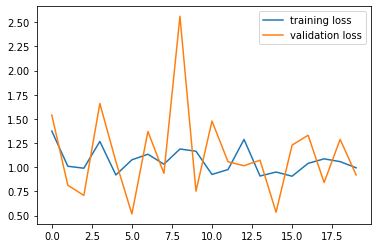

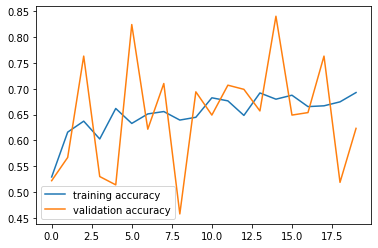

<Figure size 432x288 with 0 Axes>

In [ ]:
#loss plot
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossValidationLoss')

#accuracy plot
plt.plot(r.history['accuracy'], label='training accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccuracyValidationAccuracy')

In [ ]:
#h5 file saving
from tensorflow.keras.models import load_model
model.save('pneumonia_model_resnet50.h5')

In [ ]:
#matrix
y_pred = model.predict(testingDataset)

39/39 [==============================] - 9s 189ms/step


In [ ]:
y_pred

array([[2.4664167e-03, 9.0242296e-01, 9.5110595e-02],
       [2.2168453e-05, 9.9888426e-01, 1.0936474e-03],
       [2.2874011e-03, 9.4262856e-01, 5.5084091e-02],
       ...,
       [8.2575478e-02, 5.3596371e-01, 3.8146085e-01],
       [7.0933098e-01, 1.0785813e-04, 2.9056108e-01],
       [5.0724739e-01, 2.0329116e-02, 4.7242343e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2,
       2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2,
       0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 1,
       2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1,

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('pneumonia_model_resnet50.h5')

In [ ]:
i=image.load_img('/content/drive/MyDrive/Programs/Datasets/Test/bacteria/person100_bacteria_475.jpeg',target_size=(224,224))

In [ ]:
y=image.img_to_array(i)
y

array([[[18., 18., 18.],
        [15., 15., 15.],
        [17., 17., 17.],
        ...,
        [93., 93., 93.],
        [85., 85., 85.],
        [86., 86., 86.]],

       [[16., 16., 16.],
        [14., 14., 14.],
        [19., 19., 19.],
        ...,
        [90., 90., 90.],
        [94., 94., 94.],
        [87., 87., 87.]],

       [[18., 18., 18.],
        [10., 10., 10.],
        [20., 20., 20.],
        ...,
        [90., 90., 90.],
        [86., 86., 86.],
        [78., 78., 78.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]